# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

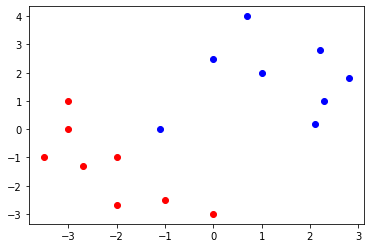

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

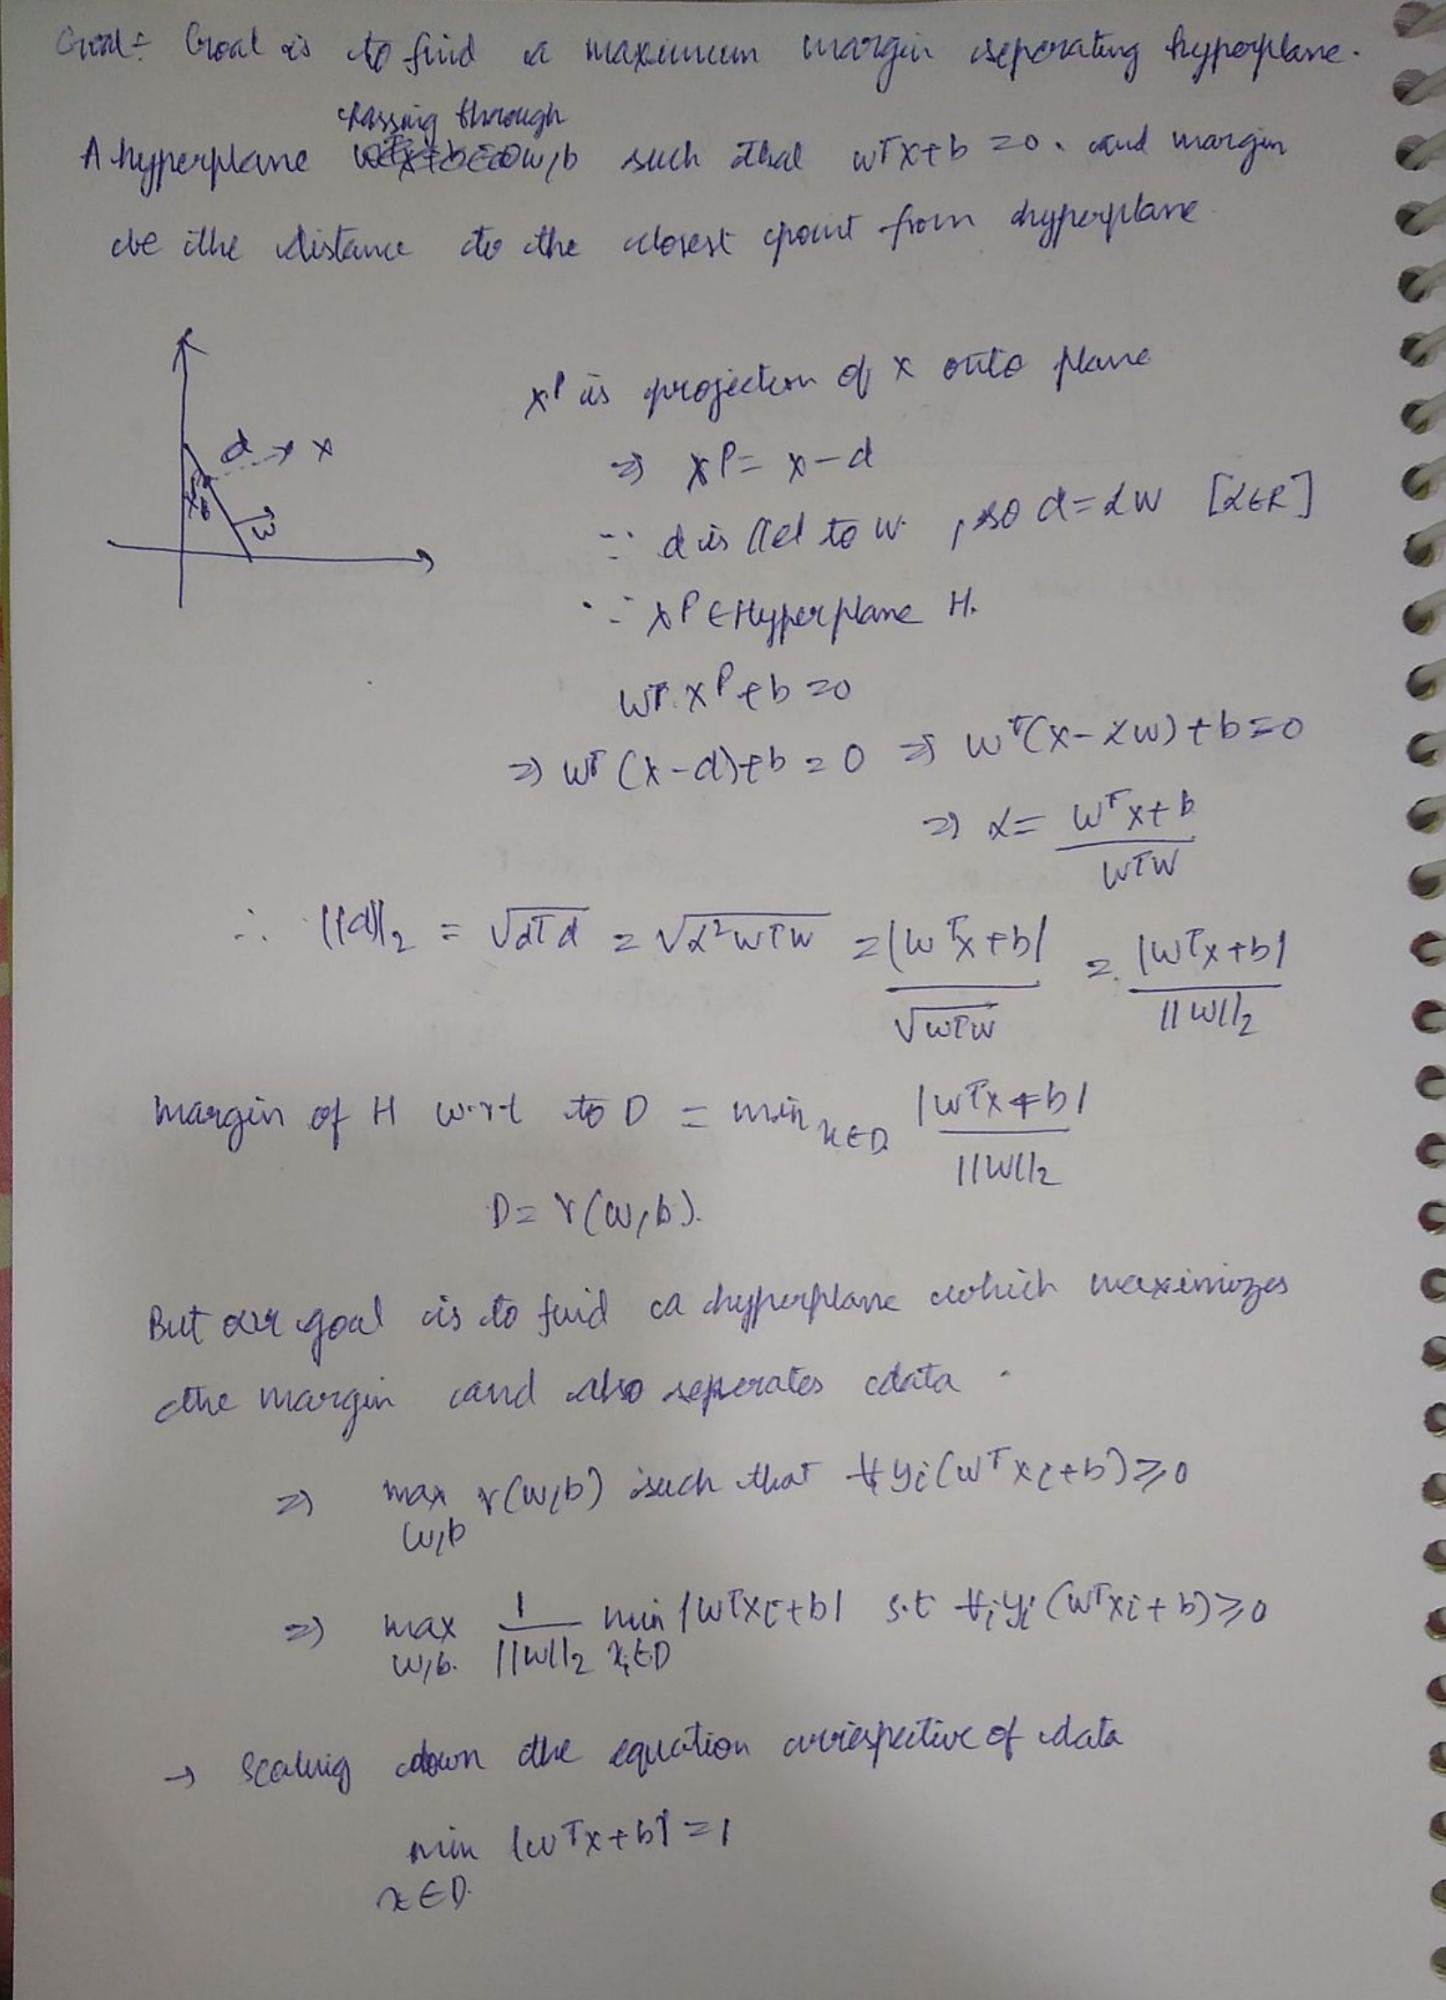

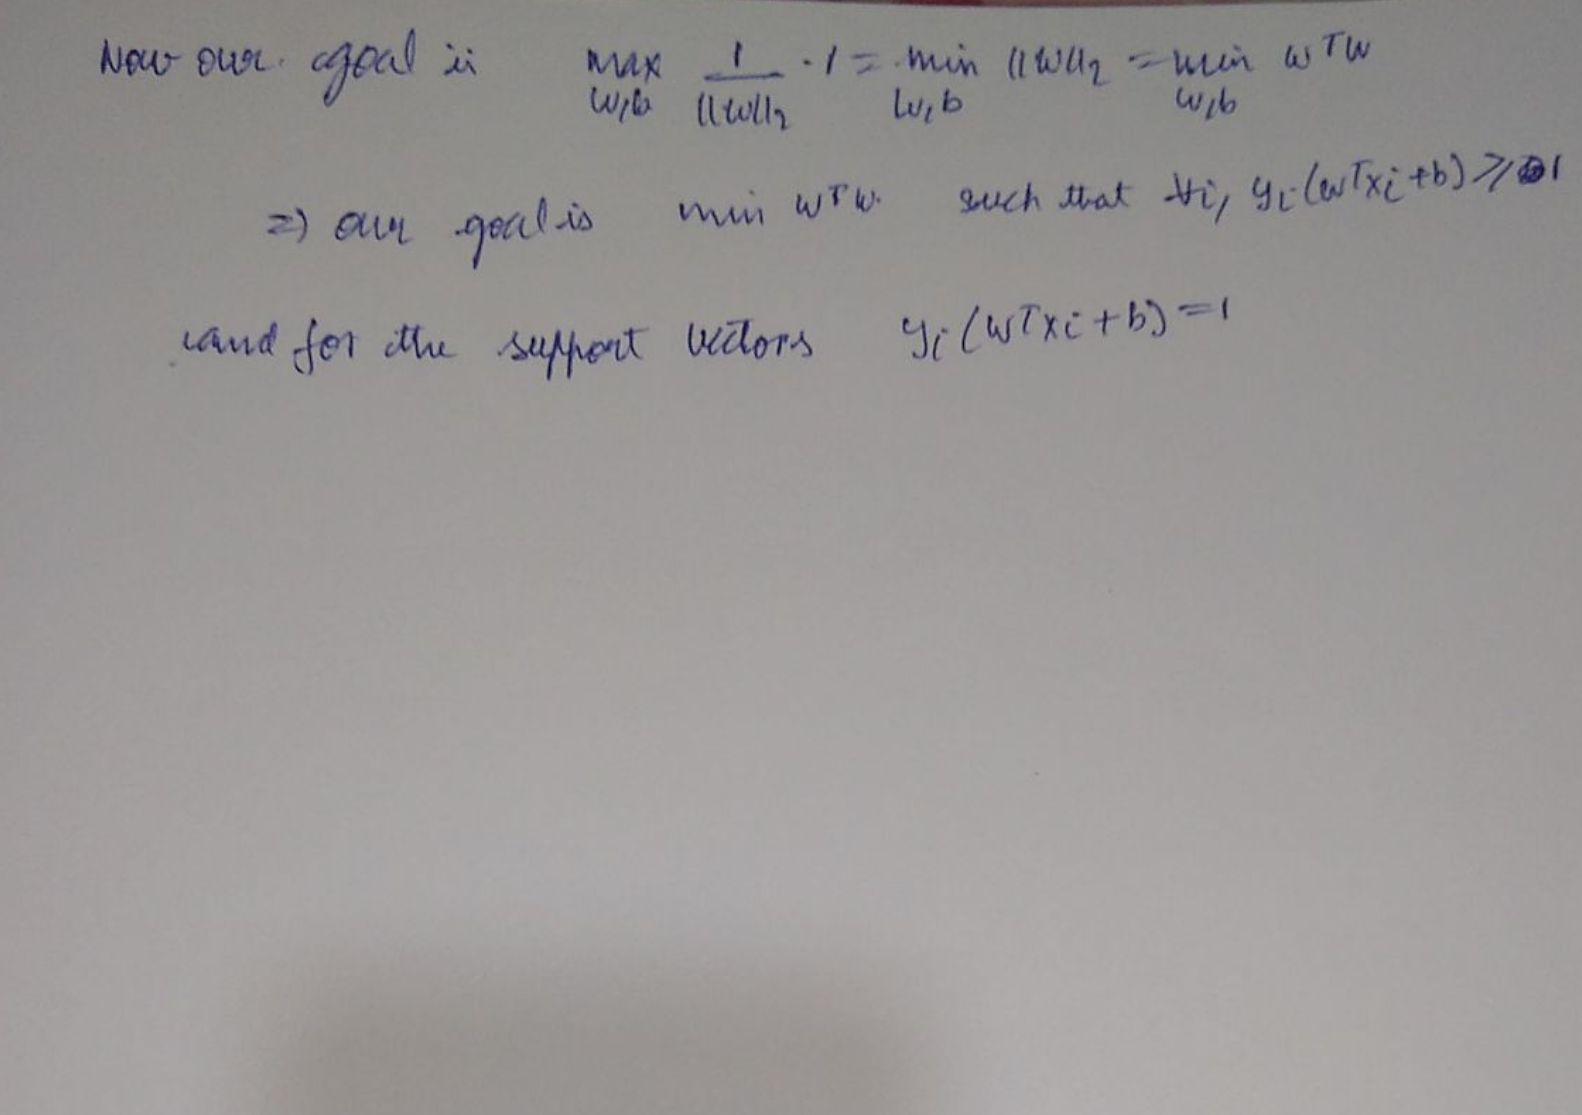

In [114]:
# Write your code here

weights = cp.Variable(X.shape[1])
bias = cp.Variable()
minimize = cp.Minimize((cp.norm(weights)**2)/2)
constraints = []

for i in range(X.shape[0]) :
    sub_const = y[i] * ((weights.T @ X[i])+bias) >= 1 
    constraints.append(sub_const)

cp_svm = cp.Problem(minimize,constraints)
cp_svm.solve()

print(weights.value)
print(bias.value)

[-1.73913043 -1.30434783]
-2.9130434780347696


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [60]:
# Write your code here
def plot_svm_margin(weight,bias,x_plot,y_plot) :
    
    x_axis = np.linspace(start = -5 , stop = 5)
    temp = weight[0] * x_axis
    plt.plot(x_axis,((-bias - temp)/weight[1]),'g')
    plt.plot(x_axis,((-bias - temp-1)/weight[1]),'b')
    plt.plot(x_axis,((-bias - temp + 1)/weight[1]),'b')
    
    #plt.plot(X,y)
    plot_points(x_plot,y_plot)
    

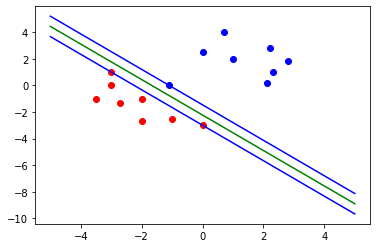

In [25]:
#plot_svm_margin(weights,bias)
weights_list = weights.value
weights_list = list(weights_list)
#print(weights_list)
#print(type(weights_list[0]))
plot_svm_margin(weights.value,bias.value,X,y)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

In [120]:

support_vectors_x = []
support_vectors_y = []

weights_transpose = weights.value
weights_transpose = weights_transpose.T
for i in range(X.shape[0]) :
    
    dummy = np.dot(weights_transpose,X[i])
    dummy = dummy + bias.value
    dummy = dummy * y[i]
    
    if abs(dummy - 1) <= 0.01 :
        support_vectors_x.append(X[i])
        support_vectors_y.append(y[i])

[]

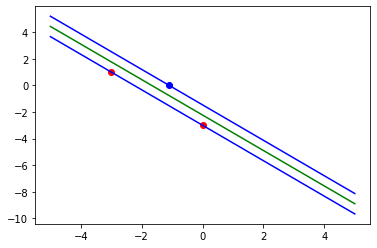

In [123]:
# Write your code here

x_axis = np.linspace(start = -5 , stop = 5)
temp = weights.value[0] * x_axis
plt.plot(x_axis,((-bias.value - temp)/weights.value[1]),'g')
plt.plot(x_axis,((-bias.value - temp-1)/weights.value[1]),'b')
plt.plot(x_axis,((-bias.value - temp + 1)/weights.value[1]),'b')

plot_points(np.array(support_vectors_x),np.array(support_vectors_y))
#plt.plot(support_vectors_x[0],support_vectors_x[1],'r')
#plot_points(x_plot,y_plot)
plt.plot()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [100]:
# Re-create the Synthetic Data by adding the points and visualize the points
x_new = np.copy(X)
y_new = np.copy(y)
#x_new.append([-4,-10])
#x_new.append([4,4])
#y_new.append(1)
#y_new.append(-1)
x_new = np.append(x_new,[[-4,-10]],axis = 0)
x_new = np.append(x_new,[[4,4]],axis = 0)
#print(y_new)
y_new = np.append(y_new,1)
y_new = np.append(y_new,-1)
#print(y_new)

In [31]:
# Solve for the decision boundary using this modified dataset

weights_1 = cp.Variable(x_new.shape[1])
bias_1 = cp.Variable()
minimize_2 = cp.Minimize((cp.norm(weights_1)**2)/2)
constraints_2 = []

for i in range(x_new.shape[0]) :
    sub_const = y_new[i] * ((weights_1.T @ x_new[i])+bias_1) >= 1 
    constraints_2.append(sub_const)

cp_svm_2 = cp.Problem(minimize_2,constraints_2)
cp_svm_2.solve()

print(weights_1.value)
print(bias_1.value)

[-1.73913043 -1.30434783]
-2.9130434780347696


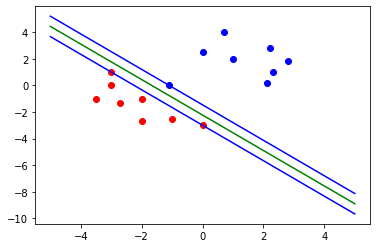

In [32]:
plot_svm_margin(weights_1.value,bias_1.value)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [76]:
def soft_margin(C) :
    
    weights = cp.Variable(x_new.shape[1])
    bias = cp.Variable()
    error = cp.Variable(x_new.shape[0])
    #minimize = cp.Minimize((cp.norm(weights)**2/2+C*(cp.sum(error))))
    minimize = cp.Minimize((cp.norm(weights)**2)/2+C*(cp.sum(error)))
    constraints = []

    for i in range(x_new.shape[0]) :
        sub_const = y_new[i] * ((weights.T @ x_new[i])+bias) >= 1 
        constraints.append(sub_const)
        #if error[i] >= 0 :
        #    constraints[-1] = constraints[-1] + 1
    
    constraint1 = [error[i]>=0 for i in range(x_new.shape[0])]
    
    #print(constraint1.value)
    
    cp_svm = cp.Problem(minimize,constraints+constraint1)
    cp_svm.solve()
    
    return [weights.value,bias.value,error.value]
    

[-1.73913043 -1.30434783]
-2.9130434781254326


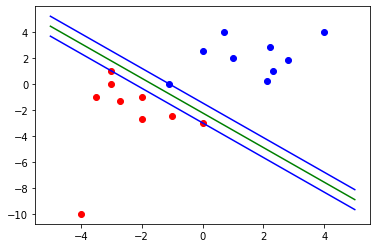

In [78]:
# Write your code here for C= 0.01

#print(x_new.shape)
list1 = soft_margin(0.01)
#print(list1[0])
plot_svm_margin(list1[0],list1[1],x_new,y_new)
print(list1[0])
print(list1[1])

[-1.73913043 -1.30434783]
-2.91304347811056


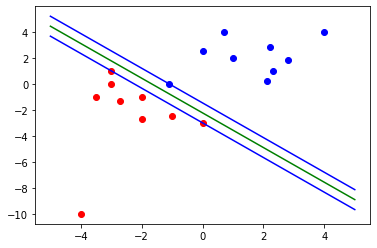

In [80]:
# Write your code here for C= 0.1
list2 = soft_margin(0.1)

print(list2[0])
print(list2[1])

plot_svm_margin(list2[0],list2[1],x_new,y_new)

[-1.73913043 -1.30434783]
-2.913043478276267


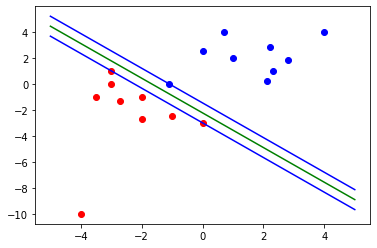

In [81]:
# Write your code here for C= 3
list3 = soft_margin(3)

print(list3[0])
print(list3[1])

plot_svm_margin(list3[0],list3[1],x_new,y_new)

[-1.73913043 -1.30434783]
-2.913043478250411


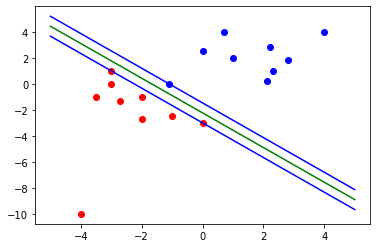

In [82]:
# Write your code here for C= 10

list4 = soft_margin(10)

print(list4[0])
print(list4[1])

plot_svm_margin(list4[0],list4[1],x_new,y_new)

[-1.73913043 -1.30434783]
-2.9130434784216144


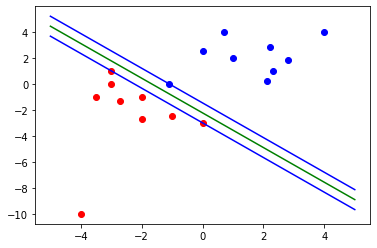

In [83]:
# Write your code here for C= 100
list5 = soft_margin(100)

print(list5[0])
print(list5[1])

plot_svm_margin(list5[0],list5[1],x_new,y_new)

In [ ]:
The increase of C did not change the decision boundary.

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

In [104]:
# Write your Code here

#print(x_new)
x_new = np.delete(x_new,2,0)
x_new = np.delete(x_new,6,0)
x_new = np.delete(x_new,6,0)
print(x_new)

[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]


In [110]:
#print(y_new)
y_new = np.delete(y_new,2)
y_new = np.delete(y_new,6)
y_new = np.delete(y_new,6)
print(y_new)

[ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]
[ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1]


[-0.38493724 -0.35146444]
-0.12133891216475792


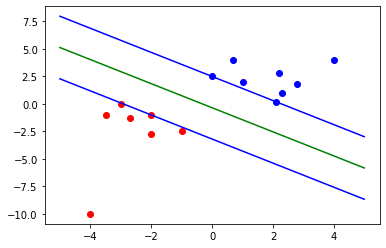

In [111]:
list6 = soft_margin(100)

print(list6[0])
print(list6[1])

plot_svm_margin(list6[0],list6[1],x_new,y_new)

In [ ]:
Yes the decision boundary has changed after removing the support vectors for previous boundaries. It has changed
because the goal of svm is to push the decision boundary margin as far as possible and removing the support
vectors has helped it expand more

### Subsection 2

In [8]:
!pip3 install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-07 00:52:30--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  2.56MB/s    in 4.2s    

2021-03-07 00:52:35 (2.27 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-07 00:52:35--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labels

In [1]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [2]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [3]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [7]:
s1 = set(labels)
print(s1)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
images_final_train = []
images_final_test = []
labels_final_train = []
labels_final_test = []

for i in range(len(labels_train)):
    if labels_train[i] == 0 or labels_train[i] == 1 or labels_train[i] == 2 :
        images_final_train.append(images_train[i])
        labels_final_train.append(labels_train[i])


for i in range(len(labels_test)) :
    
    if labels_test[i] == 0 or labels_test[i] == 1 or labels_test[i] == 2 :
        images_final_test.append(images_test[i])
        labels_final_test.append(labels_test[i])
    
images_final_train = np.array(images_final_train)
labels_final_train = np.array(labels_final_train)
images_final_test = np.array(images_final_test)
labels_final_test = np.array(labels_final_test)
print(images_final_train.shape)
print(labels_final_train.shape)
print(images_final_test.shape)
print(labels_final_test.shape)

(18623, 784)
(18623,)
(3147, 784)
(3147,)


In [10]:
from sklearn.svm import SVC

In [14]:
# here C is 1 ,kernel = "rbf" and gamma = scale
svm_1 = SVC()  
svm_1.fit(images_final_train,labels_final_train)
svm_1.score(images_final_test,labels_final_test)

0.9955513187162377

In [15]:
# here C is 0.01 , kernel = "rbf" and gamma =  scale

svm_2 = SVC(C = 0.01)
svm_2.fit(images_final_train,labels_final_train)
svm_2.score(images_final_test,labels_final_test)

0.9882427708929139

In [16]:
# here C is 0.1 , kernel = "rbf" and gamma =  scale

svm_3 = SVC(C = 0.1)
svm_3.fit(images_final_train,labels_final_train)
svm_3.score(images_final_test,labels_final_test)

0.9933269780743565

In [18]:
# here C is 3 , kernel = "rbf" and gamma =  scale

svm_4 = SVC(C = 3)
svm_4.fit(images_final_train,labels_final_train)
svm_4.score(images_final_test,labels_final_test)

0.9949157928185574

In [19]:
# here C is 10 , kernel = "rbf" and gamma =  scale

svm_5 = SVC(C = 10)
svm_5.fit(images_final_train,labels_final_train)
svm_5.score(images_final_test,labels_final_test)

0.9955513187162377

In [20]:
# here C is 50 , kernel = "rbf" and gamma =  scale

svm_6 = SVC(C = 50)
svm_6.fit(images_final_train,labels_final_train)
svm_6.score(images_final_test,labels_final_test)

0.9955513187162377

In [21]:
# here C is 100 , kernel = "rbf" and gamma =  scale

svm_7 = SVC(C = 100)
svm_7.fit(images_final_train,labels_final_train)
svm_7.score(images_final_test,labels_final_test)

0.9955513187162377

In [24]:
c_list = [0.01,0.1,1,3,10,100]
gamma_list = ["scale","auto"]
kernel_list = ["rbf","linear","poly","sigmoid","precomputed"]

svm_list = []
index = 0

for c_here in c_list :
    for gamma_here in gamma_list :
        for kernel_here in kernel_list :
            try :
                svm_here = SVC(C = c_here,gamma = gamma_here,kernel = kernel_here)
                svm_here.fit(images_final_train,labels_final_train)
                score_here =  svm_here.score(images_final_test,labels_final_test)
                print("C is ",c_here,"Gamma is ",gamma_here,"Kernel is ",kernel_here," Score is ",score_here," stored at index ",index)
                index = index + 1
                svm_list.append(svm_here)
            except :
                print("Error occured "," C is ",c_here,"Gamma is ",gamma_here,"kernel is ",kernel_here)

C is  0.01 Gamma is  scale Kernel is  rbf  Score is  0.9882427708929139  stored at index  0
C is  0.01 Gamma is  scale Kernel is  linear  Score is  0.9809342230695901  stored at index  1
C is  0.01 Gamma is  scale Kernel is  poly  Score is  0.9485224022878932  stored at index  2
C is  0.01 Gamma is  scale Kernel is  sigmoid  Score is  0.9771210676835081  stored at index  3
Error occured   C is  0.01 Gamma is  scale kernel is  precomputed
C is  0.01 Gamma is  auto Kernel is  rbf  Score is  0.3606609469335875  stored at index  4
C is  0.01 Gamma is  auto Kernel is  linear  Score is  0.9809342230695901  stored at index  5
C is  0.01 Gamma is  auto Kernel is  poly  Score is  0.9939625039720369  stored at index  6
C is  0.01 Gamma is  auto Kernel is  sigmoid  Score is  0.3606609469335875  stored at index  7
Error occured   C is  0.01 Gamma is  auto kernel is  precomputed
C is  0.1 Gamma is  scale Kernel is  rbf  Score is  0.9933269780743565  stored at index  8
C is  0.1 Gamma is  scale Kern

In [ ]:
# here I have just trained the model for labels 0,1,2 and have tested for the same.

# From above we can see that we are getting highest accuracy of 99.55 for 
# C = 1 or 10 or 100 , Gamma = scale and Kernel = rbf
# We are getting the lowest accuracy of 36.06 